In [1]:
#Hu Jiaxin

# This is for prostate data analysis. 
# The data is from the book The Elements of Statistic Learning
# which is https://web.stanford.edu/~hastie/ElemStatLearn/index.html

# I used three models to fit the regression: ElasticNet, Lasso and Ridge. 

In [2]:
#import the data
import pandas as pd
import numpy as np
df = pd.read_csv('prostate.csv',header=None,sep=',', \
                 names=["col",'lcavol','lweight','age','lbph','svi', \
                        'lcp','gleason','pgg45','lpsa','train'])

In [3]:
#check if the data is correct
#pandas will show the first 5 and the last 5 rows as default
print (df.head())
print (df.tail())

   col    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0    1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1    2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2    3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3    4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4    5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   

       lpsa train  
0 -0.430783     T  
1 -0.162519     T  
2 -0.162519     T  
3 -0.162519     T  
4  0.371564     T  
    col    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
92   93  2.830268  3.876396   68 -1.386294    1  1.321756        7     60   
93   94  3.821004  3.896909   44 -1.386294    1  2.169054        7     40   
94   95  2.907447  3.396185   52 -1.386294    1  2.463853        7     10   
95   96  2.882564  3.773910   68  1.558145    1  1.558145        7     80   
96   97  3.471966  3.974998   68  0.43

In [4]:
#split the 67 train data and the 30 test data
train = df.loc[df['train']=='T']
test = df.loc[df['train']=='F']
#check
print(train.shape)
print(test.shape)

(67, 11)
(30, 11)


In [5]:
X_train = train[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
Y_train = train[['lpsa']]
print(X_train.shape)
print(Y_train.shape)

(67, 8)
(67, 1)


In [6]:
X_test = test[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
Y_test = test[['lpsa']]
print(X_test.shape)
print(Y_test.shape)

(30, 8)
(30, 1)


In [7]:
X = df[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
Y = df[['lpsa']]
print(X.shape)
print(Y.shape)

(97, 8)
(97, 1)


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.2)

In [10]:
model_1 = ElasticNet()

In [11]:
model_1.fit(X_train, Y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
Y_test_predict_1 = model_1.predict(X_test)
MSE_test_1 = mean_squared_error(Y_test_predict_1, Y_test)

Text(0.5, 3, 'Model 1: ElesticNet')

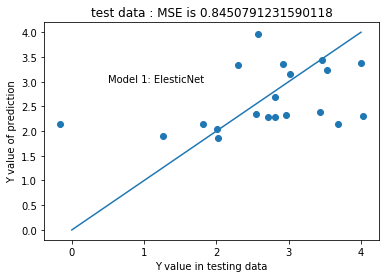

In [13]:
plt.scatter(Y_test, Y_test_predict_1)
plt.plot( [0,4],[0,4] )
plt.title("test data : MSE is %s"%(MSE_test_1))
plt.xlabel('Y value in testing data')
plt.ylabel('Y value of prediction')
plt.text(0.5, 3, 'Model 1: ElesticNet')

In [14]:
Y_train_predict_1 = model_1.predict(X_train)
MSE_train_1 = mean_squared_error(Y_train_predict_1, Y_train)

Text(0.5, 4, 'Model 1: ElesticNet')

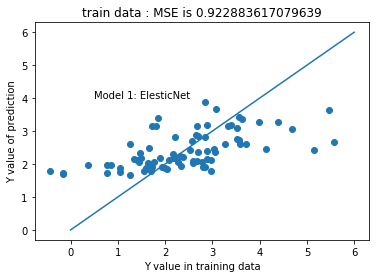

In [15]:
plt.scatter(Y_train, Y_train_predict_1)
plt.plot( [0,6],[0,6] )
plt.title("train data : MSE is %s"%(MSE_train_1))
plt.xlabel('Y value in training data')
plt.ylabel('Y value of prediction')
plt.text(0.5, 4, 'Model 1: ElesticNet')

In [16]:
model_2 = Lasso()

In [17]:
#use X_train and Y_train to train the model
model_2.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
#put the X_test data into the model and get the predicted Y values
Y_test_predict_2 = model_2.predict(X_test)
MSE_test_2 = mean_squared_error(Y_test_predict_2, Y_test)

Text(0.5, 3, 'Model 2: Lasso')

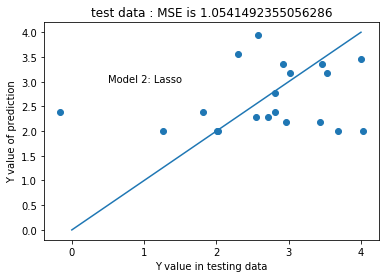

In [19]:
plt.scatter(Y_test, Y_test_predict_2)
plt.plot( [0,4],[0,4] )
plt.title("test data : MSE is %s"%(MSE_test_2))
plt.xlabel('Y value in testing data')
plt.ylabel('Y value of prediction')
plt.text(0.5, 3, 'Model 2: Lasso')

In [20]:
Y_train_predict_2 = model_2.predict(X_train)
MSE_train_2 = mean_squared_error(Y_train_predict_2, Y_train)

Text(0.5, 5, 'Model 2: Lasso')

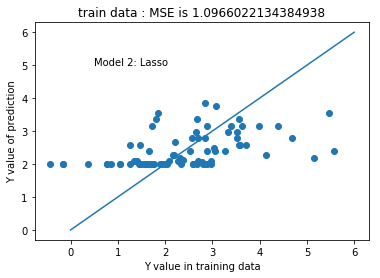

In [21]:
plt.scatter(Y_train, Y_train_predict_2)
plt.plot( [0,6],[0,6] )
plt.title("train data : MSE is %s"%(MSE_train_2))
plt.xlabel('Y value in training data')
plt.ylabel('Y value of prediction')
plt.text(0.5, 5, 'Model 2: Lasso')

In [22]:
model_3 = Ridge()

In [23]:
model_3.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
Y_test_predict_3 = model_3.predict(X_test)
MSE_test_3 = mean_squared_error(Y_test_predict_3, Y_test)

Text(0.5, 3, 'Model 3: Ridge')

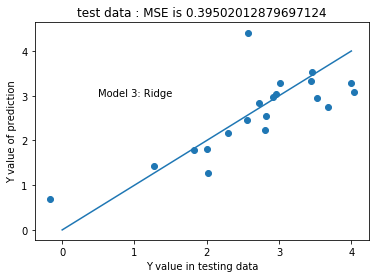

In [25]:
plt.scatter(Y_test, Y_test_predict_3)
plt.plot( [0,4],[0,4] )
plt.title("test data : MSE is %s"%(MSE_test_3))
plt.xlabel('Y value in testing data')
plt.ylabel('Y value of prediction')
plt.text(0.5, 3, 'Model 3: Ridge')

In [26]:
Y_train_predict_3 = model_3.predict(X_train)
MSE_train_3 = mean_squared_error(Y_train_predict_3, Y_train)

Text(0.5, 4, 'Model 3: Ridge')

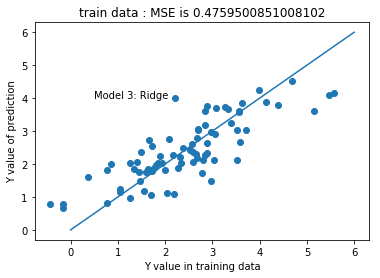

In [27]:
plt.scatter(Y_train, Y_train_predict_3)
plt.plot( [0,6],[0,6] )
plt.title("train data : MSE is %s"%(MSE_train_3))
plt.xlabel('Y value in training data')
plt.ylabel('Y value of prediction')
plt.text(0.5, 4, 'Model 3: Ridge')